# Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reading the dataset

In [2]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

## Missing Data

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handle Missing Values

In [6]:
# Filling missing Age values with mean
df['Age']=df['Age'].fillna(df['Age'].mean())

# Filling missing Embarked values with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

# Dropping Cabin 
df.drop('Cabin',axis=1,inplace=True)


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

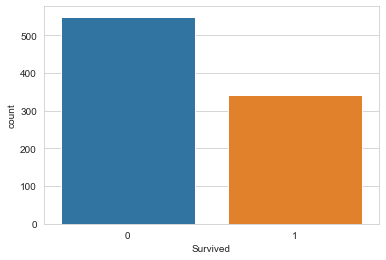

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

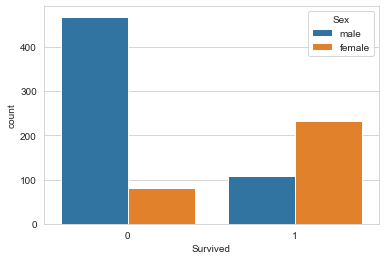

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

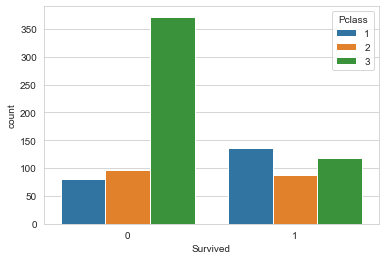

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

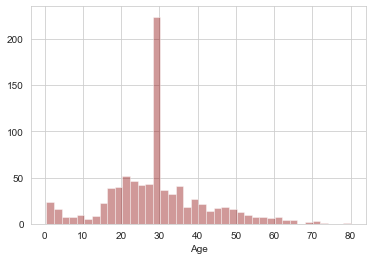

In [11]:
sns.distplot(df['Age'],kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

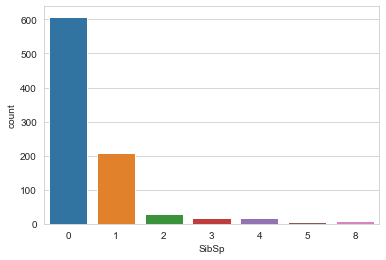

In [12]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

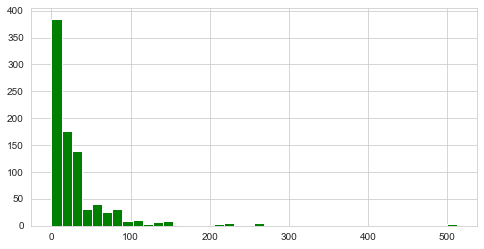

In [13]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Converting Categorical features

In [14]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [15]:
embark.head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [19]:
df=pd.concat([df,sex,embark],axis=1)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Splitting the data into independent and dependent variables

In [21]:
X=df.loc[:,df.columns!='Survived']
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [22]:
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Spliting the dataset into Training set and Testing set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 9) (268, 9) (623,) (268,)


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
X_train=sc.fit_transform(X_train)

In [26]:
X_test=sc.fit_transform(X_test)

## Fitting Random Forest Classification to the Training Set

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=50)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=50)

## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [29]:
est=RandomForestClassifier(n_jobs=-1)

In [30]:
rf_p_dist={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300,400,500],
          'max_features':randint(1,3),
          'criterion':['gini','entropy'],
          'bootstrap':[True,False],
          'min_samples_leaf':randint(1,4)}

In [31]:
def hypertuning_rscv(est,p_distr,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=p_distr,n_jobs=-1,n_iter=nbr_iter,cv=9)
    rdmsearch.fit(X,y)
    ht_params=rdmsearch.best_params_
    ht_score=rdmsearch.best_score_
    return ht_params,ht_score


In [32]:
rf_parameters,rf_ht_score=hypertuning_rscv(est,rf_p_dist,40,X,y)

In [33]:
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [34]:
rf_ht_score

0.8237934904601572

In [35]:
classifier=RandomForestClassifier(n_jobs=-1,n_estimators=300,bootstrap=False,criterion='gini',max_depth=5
                                  ,max_features=2,min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=5, max_features=2,
                       n_estimators=300, n_jobs=-1)

## Predicting the Test set results

In [36]:
y_pred=classifier.predict(X_test)

In [37]:
classifier.score(X_train,y_train)

0.8683788121990369

## Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score=accuracy_score(y_test,y_pred)

In [39]:
cm

array([[146,   8],
       [ 43,  71]], dtype=int64)

In [40]:
accuracy_score

0.8097014925373134

Since the accuracy of model on training set is 86.83% and on test set is 80.97% i.e our model is not overfitted.

## Fitting ADA-Boost on training dataset

In [55]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(n_estimators=500,learning_rate=0.01,random_state=96)

In [56]:
clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=500, random_state=96)

In [57]:
clf.score(X_train,y_train)

0.8154093097913323

In [58]:
clf.score(X_test,y_test)

0.7723880597014925

## Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [53]:
abc_dict={'n_estimators':[10,50,100,500],'learning_rate':[0.0001,0.001,0.01,0.1,1.0]}

In [54]:
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=abc_dict,n_jobs=-1,cv=10,scoring='accuracy')
# execute the grid search
grid_result=grid_search.fit(X,y)
# Summarize the best score and configuration
print("Best %f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best 0.795730 using {'learning_rate': 0.01, 'n_estimators': 500}
